In [1]:
!pip install opencv-python

In [2]:
import tensorflow as tf # this is to import tensorflow
import json # this is to import json
import pandas as pd # this is to import pandas
import numpy as np # this is to import numpy
from skimage import io, transform # this is to import skimage
from sklearn.model_selection import train_test_split # this is just for train test split lol
import cv2 # compooter vision
from tensorflow.keras import datasets, layers, models, losses, Model # this imports things
from tqdm.notebook import tqdm # this is literally just a progress bar
import os # operating system things
import glob # this is because file pathnames are a big aaaaaaaaaauuuuuuuuugh

In [3]:
# Read the json
with open("amogus.json", 'r') as f:
    data_df = pd.json_normalize([i for i in json.loads(f.read()) if i is not None])
data_df = data_df.set_index("id")
data_df

,url_256,url_1024,coordinates,country
id,,,,
1509662729539070,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null
1587956288269248,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null
1414341782427856,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null
1504003806771142,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-9.5395717634566e-07, 5.4042628244286e-08]",null
1502346620201016,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null
...,...,...,...,...
4204140206347239,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.206494380421, 9.4558343148341]",Thailand
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.169389331325, 9.3891869120472]",Thailand
3963740523712531,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.114069704404, 9.6701075610815]",Thailand


In [4]:
data_df.groupby(['country']).count()

,url_256,url_1024,coordinates
country,,,
Afghanistan,81,81,81
Albania,39,39,39
Algeria,491,491,491
Andorra,4,4,4
Angola,238,238,238
...,...,...,...
Yemen,66,66,66
Zambia,462,462,462
Zimbabwe,127,127,127


In [5]:
# images = {}
# folder = "img2"
# for filename in tqdm(os.listdir(folder)):
#     img = cv2.imread(os.path.join(folder,filename))
#     if img is not None:
#         if img.shape!=(128,256,3):
#             img = (255 * transform.resize(img, (128,256))).astype(np.uint8)
#         images[os.path.splitext(filename)[0]] = img
        
# reshape image
def reshape(img):
    if img.shape!=(192,256,3):
        img = (255 * transform.resize(img, (192,256))).astype(np.uint8)
    return img

In [6]:
images = {file: cv2.imread(file) for file in tqdm(glob.glob("img2/*.jpg"))}

  0%|          | 0/76440 [00:00<?, ?it/s]

In [7]:
img_series = pd.Series(images)
img_series = img_series[img_series.notna()].copy()
img_series = img_series[[i.shape==(192, 256, 3) for i in img_series]].copy() # change to reshape
# img_series = img_series.apply(lambda x: reshape(x))
img_series = img_series.rename(lambda str: str[5:-4]) # convert file name e.g. "img2\1000148914149750.jpg"->1000148914149750
img_series
# img_series.apply(lambda x:x.shape).value_counts() # see different aspect ratios and their freqs

1000148914149750    [[[198, 195, 180], [199, 196, 181], [200, 197,...
1000165370829738    [[[230, 214, 177], [229, 213, 176], [228, 212,...
1000308077173457    [[[255, 255, 255], [255, 255, 255], [255, 255,...
1000390084038009    [[[67, 66, 68], [69, 65, 64], [71, 59, 53], [9...
1000458640591153    [[[119, 170, 162], [186, 233, 225], [221, 255,...
                                          ...                        
998701807658769     [[[249, 255, 254], [249, 255, 254], [249, 255,...
998725354365655     [[[47, 52, 61], [29, 34, 43], [15, 17, 27], [1...
999467060756443     [[[231, 215, 192], [232, 216, 193], [232, 216,...
999582334115510     [[[189, 144, 101], [188, 143, 100], [190, 143,...
999991773868952     [[[176, 167, 163], [176, 167, 163], [176, 167,...
Length: 31661, dtype: object

In [8]:
data_df["img"] = img_series
deez = data_df.dropna()
deez

,url_256,url_1024,coordinates,country,img
id,,,,,
1509662729539070,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[144, 150, 157], [144, 150, 157], [144, 150,..."
1414341782427856,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[124, 127, 101], [255, 255, 237], [182, 181,..."
1504003806771142,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-9.5395717634566e-07, 5.4042628244286e-08]",null,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1502346620201016,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[222, 231, 234], [214, 223, 226], [215, 224,..."
1548739535521112,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[3.1402148603315e-09, -2.7646415881002e-09]",null,"[[[98, 103, 104], [98, 103, 104], [97, 102, 10..."
...,...,...,...,...,...
3894961763872349,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.130769289577, 9.5050045863067]",Thailand,"[[[114, 120, 119], [61, 67, 66], [11, 17, 16],..."
4290124437684494,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.131618903251, 9.5203148594143]",Thailand,"[[[156, 154, 154], [164, 162, 162], [157, 157,..."
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.169389331325, 9.3891869120472]",Thailand,"[[[151, 147, 146], [151, 147, 146], [151, 147,..."


In [9]:
# deez.groupby(['country']).count()

In [10]:
from sklearn.preprocessing import OneHotEncoder

country_df = deez[deez["country"] != "null"]

encoder = OneHotEncoder(handle_unknown='ignore')

enc_country_df = pd.DataFrame(encoder.fit_transform(country_df[['country']]).toarray())
enc_country_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# img_series = img_series[[i.shape==(192, 256, 3) for i in img_series]].copy()
# img_series

In [12]:
# ids = [os.path.splitext(os.path.basename(filename))[0] for filename in tqdm(img_series.index)]
# imgs = img_series.values

In [13]:
encoder.categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
        'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
        'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
        'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
        'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
        'Chile', 'China', 'Colombia', 'Congo', 'Congo-Brazzaville',
        'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', "Côte d'Ivoire", 'Democratic Republic of the Congo',
        'Denmark', 'Djibouti', 'Dominican Republic', 'East Timor',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
        'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
        'Ghana', 'Greece', 'Greenland', '

In [14]:
# coords = np.stack(data_df.loc[ids, "coordinates"])
# coords

In [15]:
country_df.img.apply(lambda x:x.shape).value_counts()

(192, 256, 3)    31111
Name: img, dtype: int64

In [16]:
country_df

,url_256,url_1024,coordinates,country,img
id,,,,,
323130512496076,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.681655598075, -0.64899339634737]",Brazil,"[[[215, 182, 137], [214, 181, 136], [214, 181,..."
477735123552105,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.680764100422, -0.64640579875362]",Brazil,"[[[180, 154, 117], [180, 154, 117], [180, 155,..."
973070119934407,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.682088909939, -0.64996962068538]",Brazil,"[[[196, 163, 117], [196, 163, 117], [197, 164,..."
508469686990915,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.679021635769, -0.64415913022745]",Brazil,"[[[221, 215, 208], [224, 218, 211], [224, 218,..."
287886579730767,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.67984767599, -0.64509245303067]",Brazil,"[[[250, 247, 242], [246, 243, 238], [242, 238,..."
...,...,...,...,...,...
3894961763872349,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.130769289577, 9.5050045863067]",Thailand,"[[[114, 120, 119], [61, 67, 66], [11, 17, 16],..."
4290124437684494,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.131618903251, 9.5203148594143]",Thailand,"[[[156, 154, 154], [164, 162, 162], [157, 157,..."
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.169389331325, 9.3891869120472]",Thailand,"[[[151, 147, 146], [151, 147, 146], [151, 147,..."


In [17]:
X_train_index, X_test_index, y_train, y_test = train_test_split(list(country_df.index), enc_country_df, test_size=0.20)

In [18]:
X_train = np.stack(img_series[X_train_index].values)
X_test = np.stack(img_series[X_test_index].values)

In [19]:
resnet_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (192,256,3))
for layer in resnet_model.layers[:-5]:
    layer.trainable = False

In [20]:
model = models.Sequential()
#model.add(layers.Lambda(lambda image: tf.image.resize(image, (128, 256))))
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(enc_country_df.columns), activation="linear"))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [39]:
model.fit(X_train[:1000], y_train[:1000], batch_size=32, epochs=5, validation_data=(X_test[:100], y_test[:100]))

Epoch 1/5
32/32 [==============================] - 575s 18s/step - loss: 0.3065 - accuracy: 0.0120 - val_loss: 0.0691 - val_accuracy: 0.0400
Epoch 2/5
32/32 [==============================] - 575s 18s/step - loss: 0.2224 - accuracy: 0.0310 - val_loss: 0.0462 - val_accuracy: 0.0300
Epoch 3/5
32/32 [==============================] - 684s 21s/step - loss: 0.1630 - accuracy: 0.0300 - val_loss: 0.0296 - val_accuracy: 0.0200
Epoch 4/5
32/32 [==============================] - 711s 22s/step - loss: 0.1205 - accuracy: 0.0530 - val_loss: 0.0197 - val_accuracy: 0.0500
Epoch 5/5
32/32 [==============================] - 709s 22s/step - loss: 0.0901 - accuracy: 0.0520 - val_loss: 0.0136 - val_accuracy: 0.0800


In [23]:
from collections import Counter
Counter([i.shape for i in tqdm(img_series)])

  0%|          | 0/31661 [00:00<?, ?it/s]

Counter({(192, 256, 3): 31661})

In [24]:
theimg = reshape(io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2RBxzDiJKUypDZkMceKYNj9jrix5r2OcM5Q&usqp=CAU"))

In [64]:
lk="https://images.unsplash.com/photo-1567994484512-55f8fe3c1a05?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZXVyb3BlYW4lMjBzdHJlZXR8ZW58MHx8MHx8&w=1000&q=80"
zxzx = model.predict(reshape(io.imread(lk))[None, ...])[0]
encoder.categories_[0][np.argmax(zxzx)]

1/1 [==============================] - 7s 7s/step


'China'

In [61]:
data_df.groupby(['country']).size().sort_values(ascending=False)[:10]

country
United States    9035
Russia           7238
Australia        4802
Brazil           4026
Canada           3418
India            2427
China            2300
Argentina        1759
Kazakhstan       1529
null             1524
dtype: int64

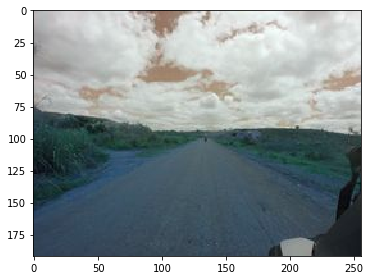

In [26]:
io.imshow(X_test[380])

In [38]:
encoder.categories_[0][int(tf.argmax(y_test.iloc[380,]))]

'Angola'

In [31]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
12047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5991,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
model.predict(theimg[None,...])

1/1 [==============================] - 6s 6s/step


-0.06805566

In [43]:
theimg[None,...].shape

(1, 192, 256, 3)